<a href="https://colab.research.google.com/github/yokesh412/ml-classification/blob/main/ml_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [54]:
dataset = pd.read_csv('/content/drive/MyDrive/data_airline_reviews.csv')

In [55]:
dataset.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,May-19,4.0,5.0,4.0,4.0,2.0,4.0,yes
1,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,May-19,4.0,1.0,1.0,1.0,1.0,1.0,no
2,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,May-19,1.0,4.0,1.0,3.0,1.0,2.0,no
3,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
4,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,May-19,1.0,1.0,1.0,1.0,1.0,1.0,no


In [56]:
dataset = dataset.drop(['author','review_date','customer_review'],axis=1)

In [57]:
dataset.head()

,airline,overall,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,7.0,NaN,Business,Economy Class,London to Izmir via Istanbul,May-19,4.0,5.0,4.0,4.0,2.0,4.0,yes
1,Turkish Airlines,2.0,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,May-19,4.0,1.0,1.0,1.0,1.0,1.0,no
2,Turkish Airlines,3.0,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,May-19,1.0,4.0,1.0,3.0,1.0,2.0,no
3,Turkish Airlines,10.0,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
4,Turkish Airlines,1.0,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,May-19,1.0,1.0,1.0,1.0,1.0,1.0,no


In [58]:
dataset.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,64017.000000,60681.000000,60715.000000,52608.000000,44193.000000,39358.000000,63975.000000
mean,5.145430,2.952160,3.191814,2.908170,2.863372,2.692820,2.943962
std,3.477532,1.441362,1.565789,1.481893,1.507262,1.612215,1.587370
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65947 entries, 0 to 65946
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   aircraft         19718 non-null  object 
 3   traveller_type   39755 non-null  object 
 4   cabin            63303 non-null  object 
 5   route            39726 non-null  object 
 6   date_flown       39633 non-null  object 
 7   seat_comfort     60681 non-null  float64
 8   cabin_service    60715 non-null  float64
 9   food_bev         52608 non-null  float64
 10  entertainment    44193 non-null  float64
 11  ground_service   39358 non-null  float64
 12  value_for_money  63975 non-null  float64
 13  recommended      64440 non-null  object 
dtypes: float64(7), object(7)
memory usage: 7.0+ MB


In [60]:
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]

In [61]:
for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

overall 0.0293  % missing values
aircraft 0.701  % missing values
traveller_type 0.3972  % missing values
cabin 0.0401  % missing values
route 0.3976  % missing values
date_flown 0.399  % missing values
seat_comfort 0.0799  % missing values
cabin_service 0.0793  % missing values
food_bev 0.2023  % missing values
entertainment 0.3299  % missing values
ground_service 0.4032  % missing values
value_for_money 0.0299  % missing values
recommended 0.0229  % missing values


In [62]:
#filling null values
dataset[['overall','aircraft','traveller_type','cabin','route','date_flown','seat_comfort','cabin_service','food_bev','entertainment','ground_service',
   'value_for_money','recommended']] = dataset[['overall','aircraft','traveller_type','cabin','route','date_flown','seat_comfort','cabin_service','food_bev','entertainment','ground_service',
   'value_for_money','recommended']].fillna(0)

In [63]:
dataset.isnull().sum()

airline            0
overall            0
aircraft           0
traveller_type     0
cabin              0
route              0
date_flown         0
seat_comfort       0
cabin_service      0
food_bev           0
entertainment      0
ground_service     0
value_for_money    0
recommended        0
dtype: int64

In [64]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  7


,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
0,7.0,4.0,5.0,4.0,4.0,2.0,4.0
1,2.0,4.0,1.0,1.0,1.0,1.0,1.0
2,3.0,1.0,4.0,1.0,3.0,1.0,2.0
3,10.0,4.0,5.0,5.0,5.0,5.0,5.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [65]:
dataset = dataset.rename(columns={'date_flown':'time'})

In [66]:
dataset.head()

,airline,overall,aircraft,traveller_type,cabin,route,time,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,7.0,0,Business,Economy Class,London to Izmir via Istanbul,May-19,4.0,5.0,4.0,4.0,2.0,4.0,yes
1,Turkish Airlines,2.0,0,Family Leisure,Economy Class,Istanbul to Bucharest,May-19,4.0,1.0,1.0,1.0,1.0,1.0,no
2,Turkish Airlines,3.0,0,Business,Economy Class,Rome to Prishtina via Istanbul,May-19,1.0,4.0,1.0,3.0,1.0,2.0,no
3,Turkish Airlines,10.0,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
4,Turkish Airlines,1.0,0,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,May-19,1.0,1.0,1.0,1.0,1.0,1.0,no


In [67]:
dataset.tail()

,airline,overall,aircraft,traveller_type,cabin,route,time,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
65942,Ukraine International,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,no
65943,Ukraine International,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,no
65944,Ukraine International,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,no
65945,Ukraine International,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,no
65946,Ukraine International,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,no


In [68]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 7


In [69]:
discrete_feature

['overall',
 'seat_comfort',
 'cabin_service',
 'food_bev',
 'entertainment',
 'ground_service',
 'value_for_money']

In [70]:
dataset[discrete_feature].head()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
0,7.0,4.0,5.0,4.0,4.0,2.0,4.0
1,2.0,4.0,1.0,1.0,1.0,1.0,1.0
2,3.0,1.0,4.0,1.0,3.0,1.0,2.0
3,10.0,4.0,5.0,5.0,5.0,5.0,5.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0


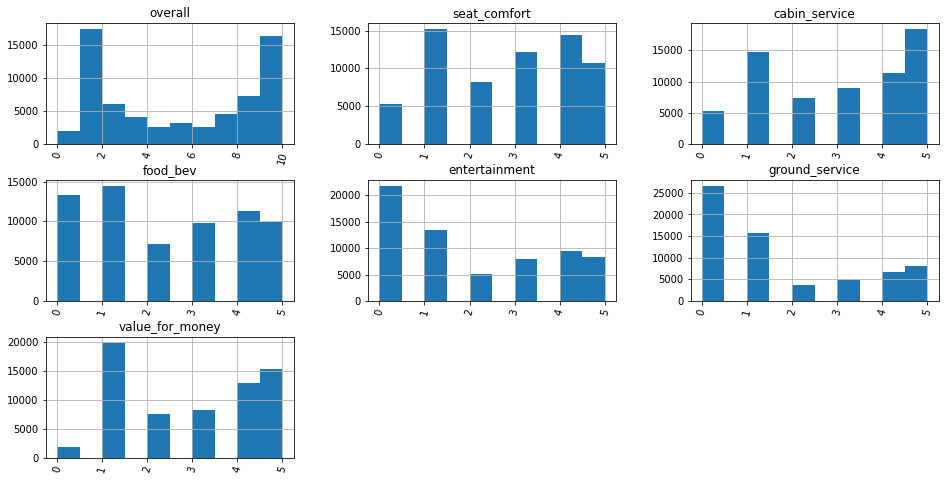

In [71]:
dataset.hist(figsize=(16,8), xrot=75)
             
plt.show()

In [72]:
#Continuous Variable
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 0


In [73]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes=='O']
categorical_features

['airline',
 'aircraft',
 'traveller_type',
 'cabin',
 'route',
 'time',
 'recommended']

In [74]:
dataset[categorical_features].head()

,airline,aircraft,traveller_type,cabin,route,time,recommended
0,Turkish Airlines,0,Business,Economy Class,London to Izmir via Istanbul,May-19,yes
1,Turkish Airlines,0,Family Leisure,Economy Class,Istanbul to Bucharest,May-19,no
2,Turkish Airlines,0,Business,Economy Class,Rome to Prishtina via Istanbul,May-19,no
3,Turkish Airlines,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,yes
4,Turkish Airlines,0,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,May-19,no


In [75]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is airline and number of categories are 81
The feature is aircraft and number of categories are 2089
The feature is traveller_type and number of categories are 5
The feature is cabin and number of categories are 5
The feature is route and number of categories are 24550
The feature is time and number of categories are 64
The feature is recommended and number of categories are 3


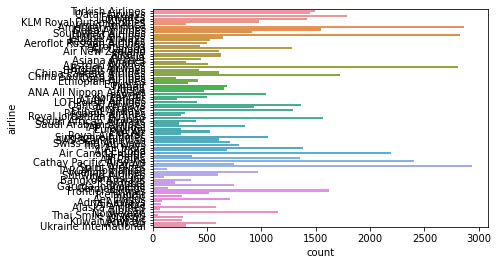

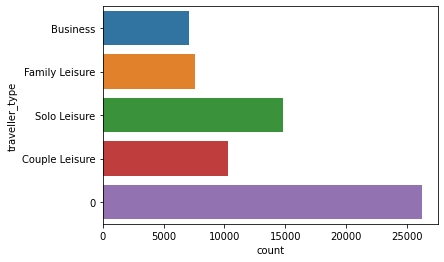

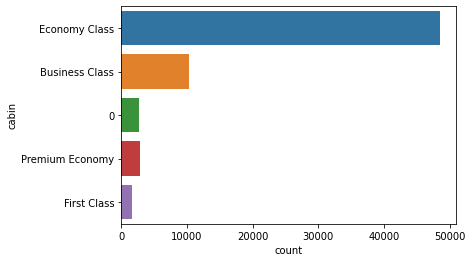

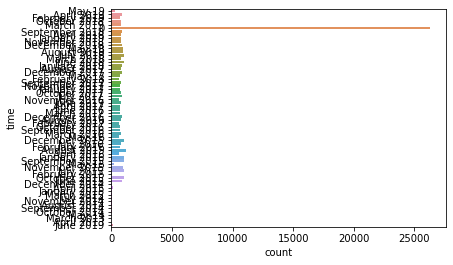

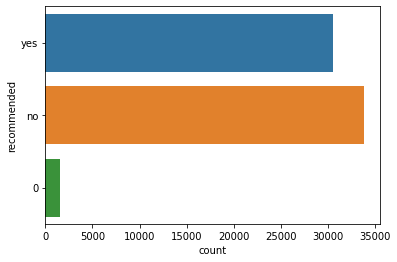

In [76]:
for col in dataset.select_dtypes(include='object'):
    if dataset[col].nunique() <= 100:
        sns.countplot(y=col, data=dataset)
        plt.show()

In [77]:
for feature in categorical_features:
    temp=dataset.groupby(feature)['recommended'].count()/len(dataset)
    temp_df=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')
    

In [78]:
dataset.head(100)

,airline,overall,aircraft,traveller_type,cabin,route,time,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,7.0,0,Business,Economy Class,Rare_var,Rare_var,4.0,5.0,4.0,4.0,2.0,4.0,yes
1,Turkish Airlines,2.0,0,Family Leisure,Economy Class,Rare_var,Rare_var,4.0,1.0,1.0,1.0,1.0,1.0,no
2,Turkish Airlines,3.0,0,Business,Economy Class,Rare_var,Rare_var,1.0,4.0,1.0,3.0,1.0,2.0,no
3,Turkish Airlines,10.0,A330,Solo Leisure,Economy Class,Rare_var,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
4,Turkish Airlines,1.0,0,Solo Leisure,Economy Class,Rare_var,Rare_var,1.0,1.0,1.0,1.0,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Turkish Airlines,10.0,Rare_var,Couple Leisure,Business Class,Rare_var,January 2019,5.0,5.0,5.0,5.0,5.0,5.0,yes
96,Turkish Airlines,1.0,Rare_var,Business,Business Class,Rare_var,January 2019,1.0,1.0,1.0,1.0,1.0,1.0,no
97,Turkish Airlines,1.0,0,Family Leisure,Economy Class,Rare_var,December 2018,3.0,3.0,3.0,3.0,1.0,1.0,no
98,Turkish Airlines,1.0,0,Solo Leisure,Economy Class,Rare_var,January 2019,1.0,1.0,1.0,1.0,1.0,1.0,no


In [79]:
dataset.drop(['time'],axis=1)

,airline,overall,aircraft,traveller_type,cabin,route,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,7.0,0,Business,Economy Class,Rare_var,4.0,5.0,4.0,4.0,2.0,4.0,yes
1,Turkish Airlines,2.0,0,Family Leisure,Economy Class,Rare_var,4.0,1.0,1.0,1.0,1.0,1.0,no
2,Turkish Airlines,3.0,0,Business,Economy Class,Rare_var,1.0,4.0,1.0,3.0,1.0,2.0,no
3,Turkish Airlines,10.0,A330,Solo Leisure,Economy Class,Rare_var,4.0,5.0,5.0,5.0,5.0,5.0,yes
4,Turkish Airlines,1.0,0,Solo Leisure,Economy Class,Rare_var,1.0,1.0,1.0,1.0,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65942,Rare_var,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,no
65943,Rare_var,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,no
65944,Rare_var,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,no
65945,Rare_var,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,no


In [80]:
dataset.traveller_type.unique()

array(['Business', 'Family Leisure', 'Solo Leisure', 'Couple Leisure', 0],
      dtype=object)

In [81]:
dataset['traveller_type'] = dataset['traveller_type'].replace({'Business':4,'Family Leisure':3,'Solo Leisure':2,'Couple Leisure':1})

In [82]:
dataset.cabin.unique()

array(['Economy Class', 'Business Class', 0, 'Premium Economy',
       'First Class'], dtype=object)

In [83]:
dataset['cabin'] = dataset['cabin'].replace({'Economy Class':1,'Business Class':2,'Premium Economy':3,'First Class':4})


In [84]:
dataset.recommended.unique()

array(['yes', 'no', 0], dtype=object)

In [85]:
dataset['recommended'] = dataset['recommended'].replace({0:'yes'})

In [86]:
dataset['airline'] = pd.get_dummies(dataset.airline, prefix='Airline')


In [87]:
dataset['aircraft'] = pd.get_dummies(dataset.aircraft, prefix='aircraft')

In [88]:
dataset['route'] = pd.get_dummies(dataset.route, prefix='route')

In [89]:
dataset['recommended'] = dataset['recommended'].replace({'yes':1,'no':0})

In [90]:
dataset.head()

,airline,overall,aircraft,traveller_type,cabin,route,time,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,0,7.0,1,4,1,0,Rare_var,4.0,5.0,4.0,4.0,2.0,4.0,1
1,0,2.0,1,3,1,0,Rare_var,4.0,1.0,1.0,1.0,1.0,1.0,0
2,0,3.0,1,4,1,0,Rare_var,1.0,4.0,1.0,3.0,1.0,2.0,0
3,0,10.0,0,2,1,0,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,1
4,0,1.0,1,2,1,0,Rare_var,1.0,1.0,1.0,1.0,1.0,1.0,0


In [91]:
dataset = dataset.drop(['time'],axis=1)

In [92]:
dataset.head()

,airline,overall,aircraft,traveller_type,cabin,route,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,0,7.0,1,4,1,0,4.0,5.0,4.0,4.0,2.0,4.0,1
1,0,2.0,1,3,1,0,4.0,1.0,1.0,1.0,1.0,1.0,0
2,0,3.0,1,4,1,0,1.0,4.0,1.0,3.0,1.0,2.0,0
3,0,10.0,0,2,1,0,4.0,5.0,5.0,5.0,5.0,5.0,1
4,0,1.0,1,2,1,0,1.0,1.0,1.0,1.0,1.0,1.0,0


In [93]:
dataset.isnull().sum()

airline            0
overall            0
aircraft           0
traveller_type     0
cabin              0
route              0
seat_comfort       0
cabin_service      0
food_bev           0
entertainment      0
ground_service     0
value_for_money    0
recommended        0
dtype: int64

In [94]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65947 entries, 0 to 65946
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  uint8  
 1   overall          65947 non-null  float64
 2   aircraft         65947 non-null  uint8  
 3   traveller_type   65947 non-null  int64  
 4   cabin            65947 non-null  int64  
 5   route            65947 non-null  uint8  
 6   seat_comfort     65947 non-null  float64
 7   cabin_service    65947 non-null  float64
 8   food_bev         65947 non-null  float64
 9   entertainment    65947 non-null  float64
 10  ground_service   65947 non-null  float64
 11  value_for_money  65947 non-null  float64
 12  recommended      65947 non-null  int64  
dtypes: float64(7), int64(3), uint8(3)
memory usage: 5.2 MB


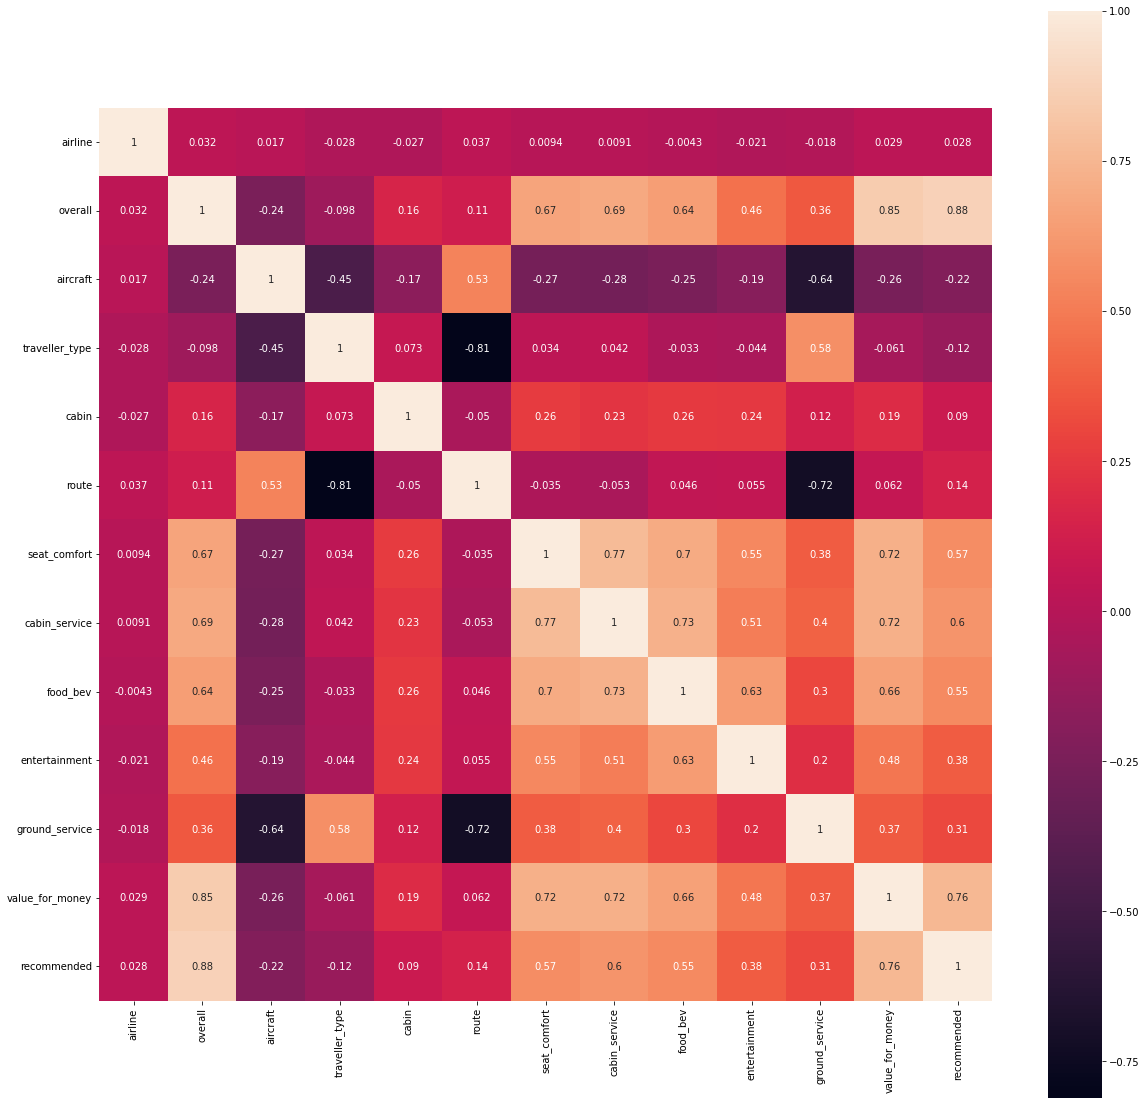

In [95]:
data = dataset.copy()
corr_matrix = data.corr()
fig = plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, square=True);

In [96]:
#Multi collinearity check
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

In [97]:
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [98]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(dataset, 40))

Top Absolute Correlations
overall          recommended        0.878717
                 value_for_money    0.846657
traveller_type   route              0.810454
seat_comfort     cabin_service      0.767126
value_for_money  recommended        0.755687
cabin_service    food_bev           0.728959
seat_comfort     value_for_money    0.720720
cabin_service    value_for_money    0.718933
route            ground_service     0.718713
seat_comfort     food_bev           0.699992
overall          cabin_service      0.694380
                 seat_comfort       0.670238
food_bev         value_for_money    0.657117
overall          food_bev           0.640646
aircraft         ground_service     0.635027
food_bev         entertainment      0.634419
cabin_service    recommended        0.598922
traveller_type   ground_service     0.579750
seat_comfort     recommended        0.570221
food_bev         recommended        0.554591
seat_comfort     entertainment      0.552361
aircraft         route       

In [99]:
corr_matrix = corr_matrix[['recommended']].copy()
corr_matrix.drop(index='recommended', inplace=True)
corr_matrix.sort_values('recommended', inplace=True)
# remove those features who have less than 10% (0.1) relationship with the targe variable

features_to_keep = corr_matrix.loc[~corr_matrix['recommended'].between(-0.99, 0.0999)]
features_to_keep = features_to_keep.index.tolist()
features_to_keep

['route',
 'ground_service',
 'entertainment',
 'food_bev',
 'seat_comfort',
 'cabin_service',
 'value_for_money',
 'overall']

In [100]:
dataset = dataset[features_to_keep+['recommended']].copy()
dataset.shape

(65947, 9)

So, out of 13 features, we have removed the redundent ones and using only useful 9 features.

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import time

In [109]:
#preprocessing data
X_data = dataset.drop(columns=['recommended']).copy()
y_data = dataset[['recommended']].copy()
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 0)

In [110]:
models = [
           ['LogisticRegression: ',LogisticRegression()],
           ['LogisticRegressionCV: ', LogisticRegressionCV()],
           ['DecisionTreeClassifier: ', DecisionTreeClassifier()],
           ['KNeighborsClassifier: ',  KNeighborsClassifier()],
           ['GaussianNB:' , GaussianNB()],
           ['SVC:',SVC()],
         ]

In [111]:
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["roc_auc_score"] = roc_auc_score(y_train,curr_model.predict(X_train))
    curr_model_data["accuracy_score"] = accuracy_score(y_test,curr_model.predict(X_test))
    curr_model_data["confusion_matrix"] = confusion_matrix(y_test,curr_model.predict(X_test))
    model_data.append(curr_model_data)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [112]:
result_df = pd.DataFrame(model_data)

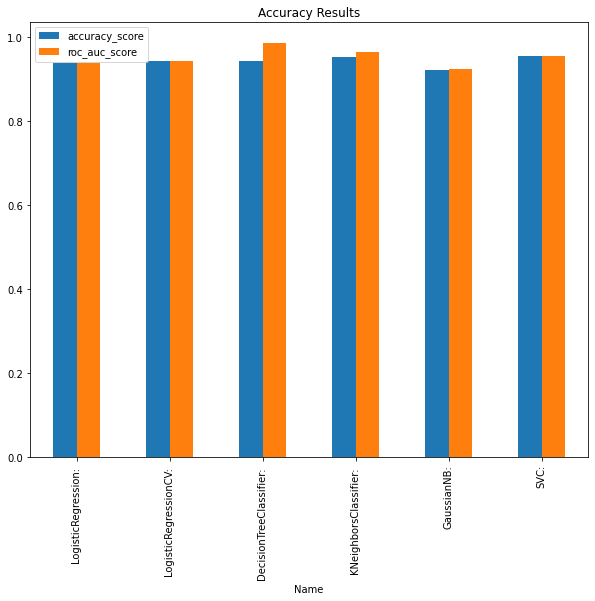

In [113]:
#visualizing result
result_df.plot(x="Name", y=['accuracy_score' , 'roc_auc_score' ,'confusion_matrix'], 
               kind="bar" , 
               title = 'Accuracy Results' , 
               figsize= (10,8)) ;

From above graph ,DecisionTressClassifier model performing better than other model